<a href="https://colab.research.google.com/github/dayudyah20/Model-April/blob/main/25_APRIL_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Model Normal yang Diskusi dengan Dospem

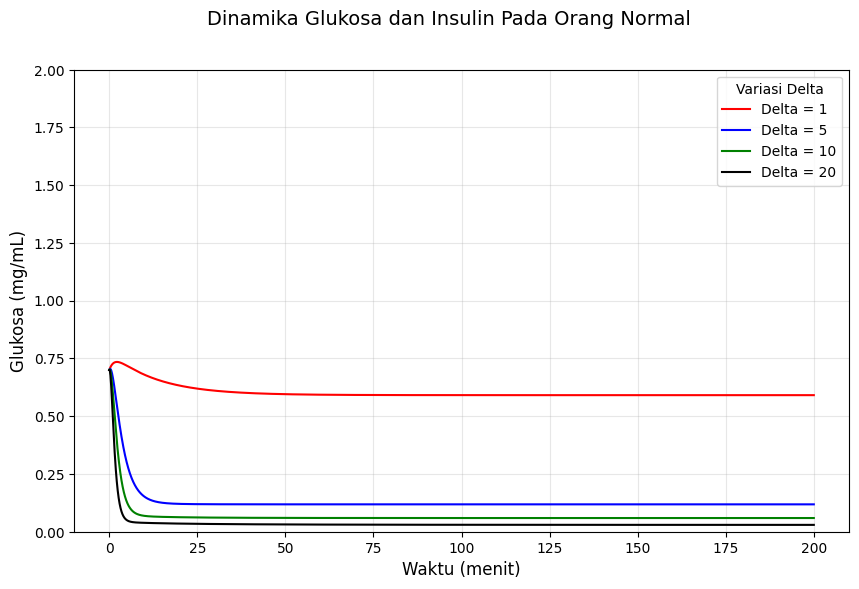

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

    #def f(z, t, alpha, gamma, theta, delta, beta):
    #G, I = z
    #dGdt = alpha - gamma * G - theta * G * I  # Penurunan glukosa perlahan
    #dIdt = delta * G - beta * I * G           # Insulin naik sebagai respons glukosa
    #return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 4.5
gamma = 0.0002
theta = 0.00075919
beta = 0.01

#alpha = 4.5    # Penerimaan glukosa
#gamma = 0.0002 # Penggunaan glukosa tanpa insulin
#theta = 0.00075919 # Pengaruh insulin pada glukosa
#delta = 0.2298 # Sekresi insulin dari glukosa
#beta = 1500  # Clearance insulin

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)

# Variasi delta yang ingin diuji
delta_list = [1, 5, 10, 20]
colors = ['red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, delta in enumerate(delta_list):
    z0 = [70.0, 5.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Delta = {delta}',
             linestyle='dotted' if delta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Variasi Delta", fontsize=10)
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()

Model Checking Insulin

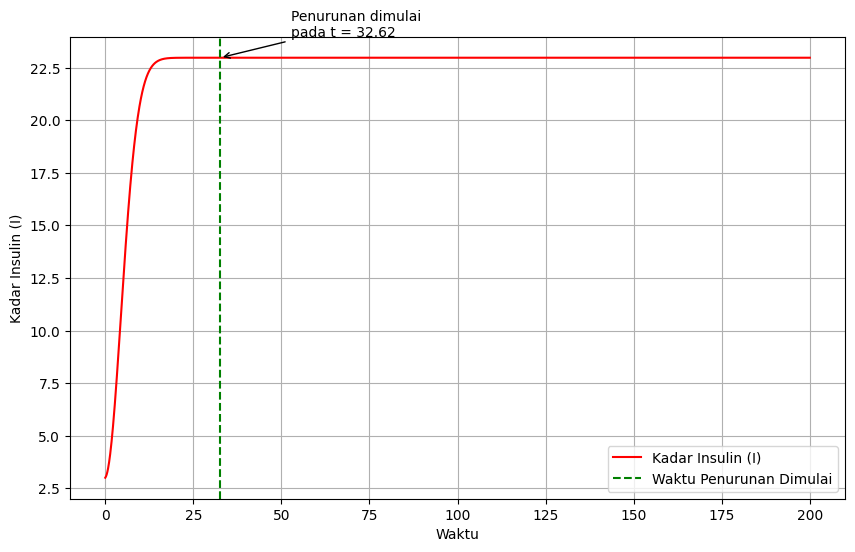

          Waktu  Kadar Glukosa (G)  Kadar Insulin (I)
0       0.00000           1.000000           3.000000
1       0.10005           1.449920           3.024472
2       0.20010           1.899725           3.057883
3       0.30015           2.349411           3.100185
4       0.40020           2.798973           3.151320
...         ...                ...                ...
1995  199.59980         247.559981          22.980000
1996  199.69985         247.573127          22.980000
1997  199.79990         247.586250          22.980000
1998  199.89995         247.599350          22.980000
1999  200.00000         247.612427          22.980000

[2000 rows x 3 columns]
Penurunan insulin dimulai pada waktu t = 32.62


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameter Sistem
alpha_new = 4.5     # Penerimaan glukosa
gamma_new = 0.0002  # Penggunaan glukosa tanpa insulin
theta_new = 0.00075919  # Pengaruh insulin pada glukosa
delta_new = 0.2298  # Sekresi insulin dari glukosa
beta_new = 0.01     # Clearance insulin

# Model persamaan diferensial
def model(y, t, alpha, gamma, theta, delta, beta):
    G, I = y
    dGdt = alpha - gamma * G - theta * G * I  # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G          # perubahan kadar insulin
    return [dGdt, dIdt]

# Kondisi awal
G0_new = 1.0  # Kadar glukosa awal
I0_new = 3.0  # Kadar insulin awal

# Rentang waktu simulasi
t_extended = np.linspace(0, 200, 2000)

# Menyelesaikan sistem persamaan diferensial dengan parameter baru dan rentang waktu yang diperpanjang
solution_extended = odeint(model, [G0_new, I0_new], t_extended, args=(alpha_new, gamma_new, theta_new, delta_new, beta_new))

# Menyimpan hasil untuk G dan I
G_extended = solution_extended[:, 0]
I_extended = solution_extended[:, 1]
dIdt_extended = delta_new * G_extended - beta_new * I_extended * G_extended  # Laju perubahan insulin

# Mencari kapan dI/dt menjadi negatif (penurunan insulin)
time_when_decreases_extended = t_extended[np.argmax(dIdt_extended < 0)] if np.any(dIdt_extended < 0) else None



# Menampilkan grafik perubahan insulin dengan rentang waktu yang lebih panjang
plt.figure(figsize=(10, 6))
plt.plot(t_extended, I_extended, label="Kadar Insulin (I)", color='red')

# Menambahkan garis vertikal pada waktu penurunan insulin pertama kali dimulai
if time_when_decreases_extended is not None:


    plt.axvline(x=time_when_decreases_extended, color='green', linestyle='--', label="Waktu Penurunan Dimulai")
    # Menambahkan anotasi untuk menunjukkan penurunan insulin
    plt.annotate(f'Penurunan dimulai\npada t = {time_when_decreases_extended:.2f}',
                 xy=(time_when_decreases_extended, I_extended[np.argmax(dIdt_extended < 0)]),
                 xytext=(time_when_decreases_extended + 20, I_extended[np.argmax(dIdt_extended < 0)] + 1),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10)

plt.xlabel("Waktu")
plt.ylabel("Kadar Insulin (I)")
#plt.title("Perubahan Kadar Insulin (I) Seiring Waktu (Beta = 0.01) dengan Penurunan yang Diperjelas")
plt.legend()
plt.grid(True)
plt.show()

# Menampilkan solusi untuk G dan I dalam bentuk DataFrame
solution_df = pd.DataFrame({
    'Waktu': t_extended,
    'Kadar Glukosa (G)': G_extended,
    'Kadar Insulin (I)': I_extended
})

# Menampilkan solusi dalam tabel
print(solution_df)  # Menampilkan 5 baris pertama dari solusi

# Menampilkan waktu dimana penurunan insulin dimulai jika ada
print(f"Penurunan insulin dimulai pada waktu t = {time_when_decreases_extended:.2f}")

##Model Coba Normal

Model orang Normal

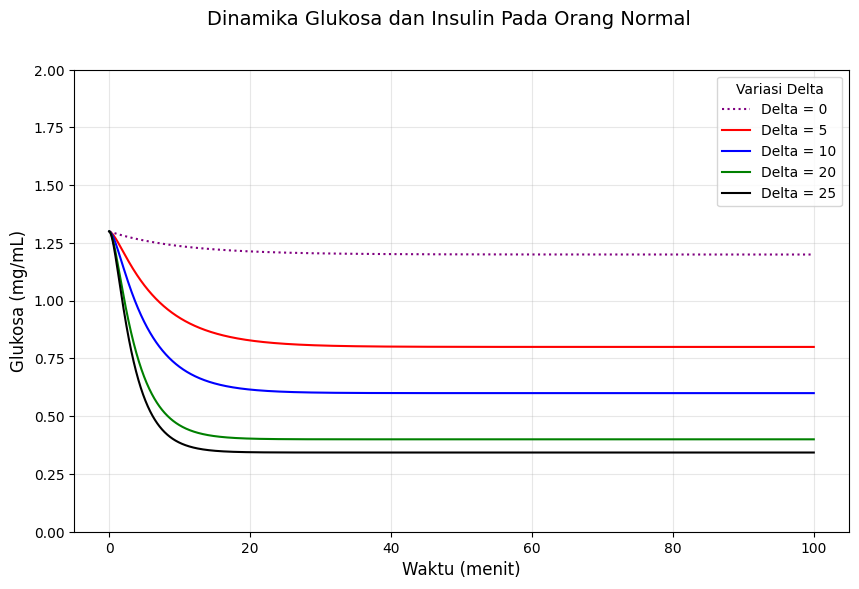

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 12
gamma = 0.1
theta = 0.00009
beta = 0.009

# Rentang waktu simulasi
t = np.linspace(0, 100, 3000)

# Variasi delta yang ingin diuji
delta_list = [0, 5, 10 , 20, 25]
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, delta in enumerate(delta_list):
    z0 = [130.0, 5.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Delta = {delta}',
             linestyle='dotted' if delta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Variasi Delta", fontsize=10)
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()

In [ ]:
# Menghitung titik kesetimbangan berdasarkan formula yang diberikan
G_eq = alpha * beta / (beta * gamma + delta * theta)
I_eq = delta / beta

# Menghitung nilai eigen berdasarkan formula yang diberikan
lambda_1 = (-(beta * gamma) - (theta * delta)) / beta
lambda_2 = -(alpha * beta**2) / (beta * gamma + delta * theta)

# Menampilkan titik kesetimbangan dan nilai eigen
print(f"Titik Kesetimbangan: G = {G_eq:.2f}, I = {I_eq:.2f}")
print(f"Nilai Eigen: \u03bb_1 = {lambda_1:.2f}, \u03bb_2 = {lambda_2:.2f}")

##Model untuk DM1 titk kritis I = 0

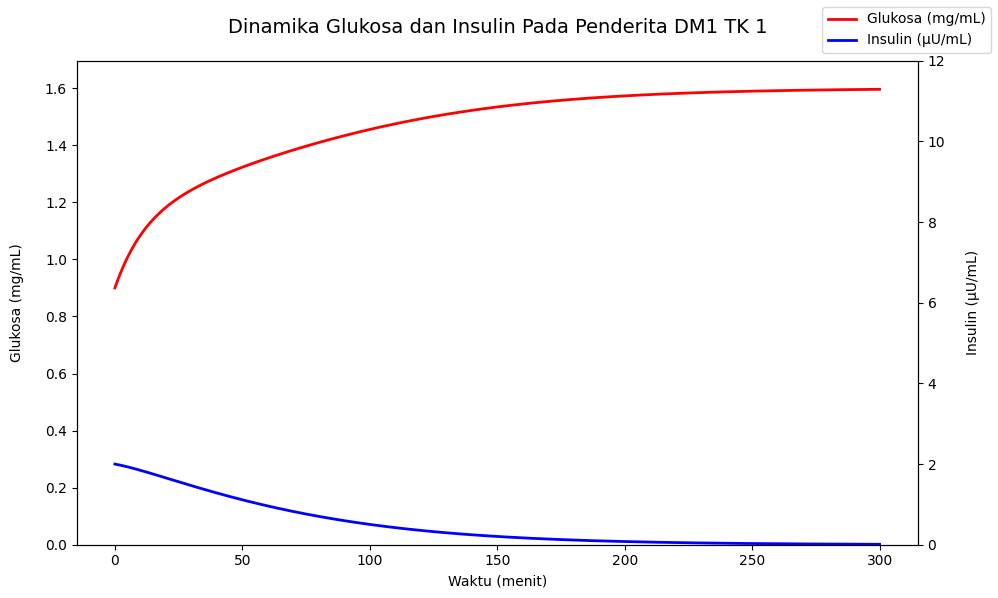

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# Parameter-parameter
alpha = 9.6  # Penerimaan glukosa
gamma = 0.06  # Penggunaan glukosa
theta = 0.009  # Pengaruh insulin
sigma = 0.012  # Efektivitas insulin
epsilon = 0.0001  # Tingkat kejenuhan
beta = 0.0002  # Laju clearance insulin

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    # Perubahan kadar glukosa (mg/dL/min)
    dGdt = alpha - gamma * G - theta * G * I
    # Perubahan kadar insulin (μU/ml/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Fungsi untuk metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Kondisi awal
z0 = np.array([90.0, 2.0])

# Rentang waktu simulasi
t = np.linspace(0, 300, 3000)

# Simulasi numerik
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0]
insulin = solution[:, 1]

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)


# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)


# Judul dan legenda
ax1.set_title('Dinamika Glukosa dan Insulin Pada Penderita DM1 TK 1', fontsize=14, pad=20)
fig.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


In [4]:
# Titik Kritis 1
G_kritis = alpha / gamma
I_kritis = 0  # Insulin pada titik kritis adalah 0

# Menampilkan titik kritis pertama
print("Titik Kritis 1:")
print("G (Glukosa) =", G_kritis)
print("I (Insulin) =", I_kritis)

# Hitung Nilai Eigen
lambda_1 = -gamma
lambda_2 = (sigma * gamma - beta * alpha) / gamma

print("\nNilai Eigen 1 (λ_1):", lambda_1)
print("Nilai Eigen 2 (λ_2):", lambda_2)

Titik Kritis 1:
G (Glukosa) = 160.0
I (Insulin) = 0

Nilai Eigen 1 (λ_1): -0.06
Nilai Eigen 2 (λ_2): -0.020000000000000004


##Model DM1 Injeksi Insulin

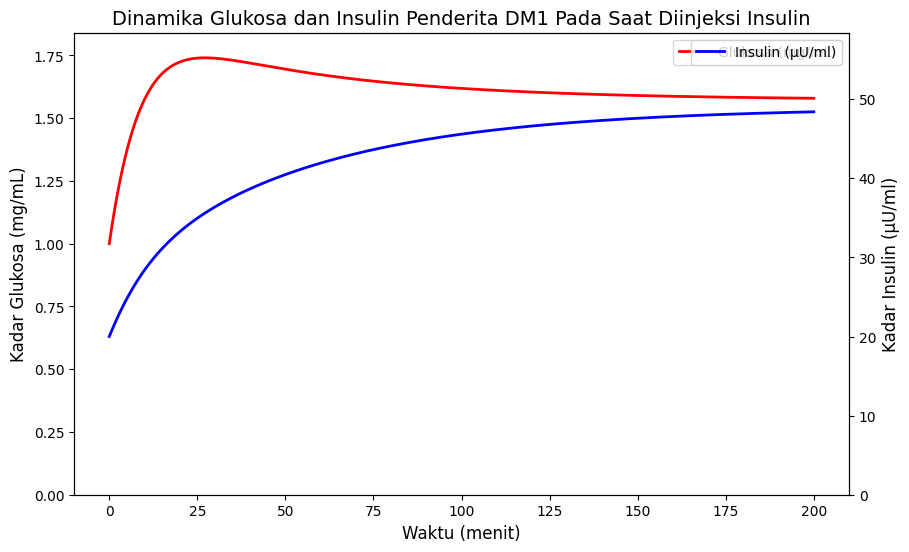

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 19.5    # penerimaan glukosa #18
gamma = 0.08   #  penggunaan glukosa tanpa insulin #0.09 #0.08
theta = 0.0009 # penggunaan glukosa bergantung insulin at #0.0006 #0.0009 #0.0008
sigma = 1.54  # Efektivitas insulin #2.5 #2
beta = 0.0002  # clearance insulin #0.0003
epsilon = 0.98 # efek saturasi #0,99 #0.97 #0.95

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)  # Hingga 200 menit


z0 = np.array([100.0, 20.0])

# Simulasi ulang dengan parameter yang memastikan glukosa turun dari 190 ke 150
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0] / 100  # Mengubah satuan glukosa dari mg/dL menjadi mg/mL
insulin = solution[:, 1]

# Plot grafik Glukosa dan Insulin
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot glukosa pada sumbu y kiri
ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)  # Menyesuaikan skala agar terlihat jelas
ax1.legend(fontsize=10)

# Buat sumbu y kanan untuk insulin
ax2 = ax1.twinx()
ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)  # Memastikan grafik tidak terpotong
ax2.legend(fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.show()

In [7]:
import math

G_kritis_2 = (alpha * beta * epsilon - theta * sigma) / (beta * (gamma * epsilon - theta))
I_kritis_2 = (-alpha * beta + gamma * sigma) / (alpha * beta * epsilon - theta * sigma)

# Menampilkan Titik Kritis Kedua
print("Titik Kritis 2:")
print("G (Glukosa) =", G_kritis_2)
print("I (Insulin) =", I_kritis_2)

# Rumus bagian dalam akar kuadrat
term_inside_sqrt = (gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
                    theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
                    (alpha * beta * epsilon - theta * sigma) ** 3 +
                    sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta))

# Menghitung λ₁
lambda_1 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) + \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menghitung λ₂
lambda_2 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) - \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menampilkan hasil
print("Nilai Lambda 1 (λ₁):", lambda_1)
print("Nilai Lambda 2 (λ₂):", lambda_2)


Titik Kritis 2:
G (Glukosa) = 157.16129032258064
I (Insulin) = 48.97372742200328
Nilai Lambda 1 (λ₁): -0.07743084226763511
Nilai Lambda 2 (λ₂): -0.07743622057601232


##PERCOBAAN MODEL UNTUK NORMAL GANTI PARAMETER

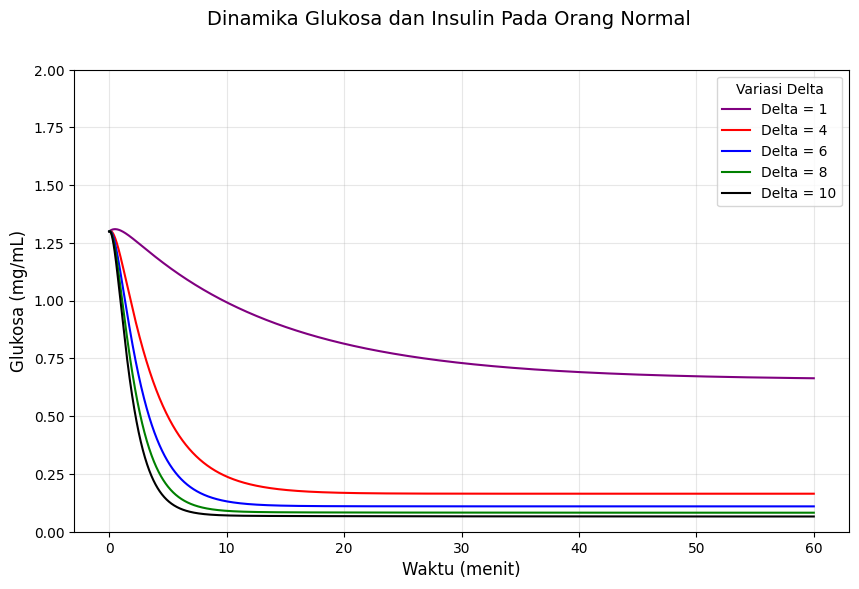

In [44]:
#1
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 5
gamma = 0.0002
theta = 0.00075919
beta = 0.01

# Rentang waktu simulasi
t = np.linspace(0, 60, 3000)

# Variasi delta yang ingin diuji
delta_list = [1, 4, 6, 8, 10]
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, delta in enumerate(delta_list):
    z0 = [130.0, 5.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Delta = {delta}',
             linestyle='dotted' if delta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Variasi Delta", fontsize=10)
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()


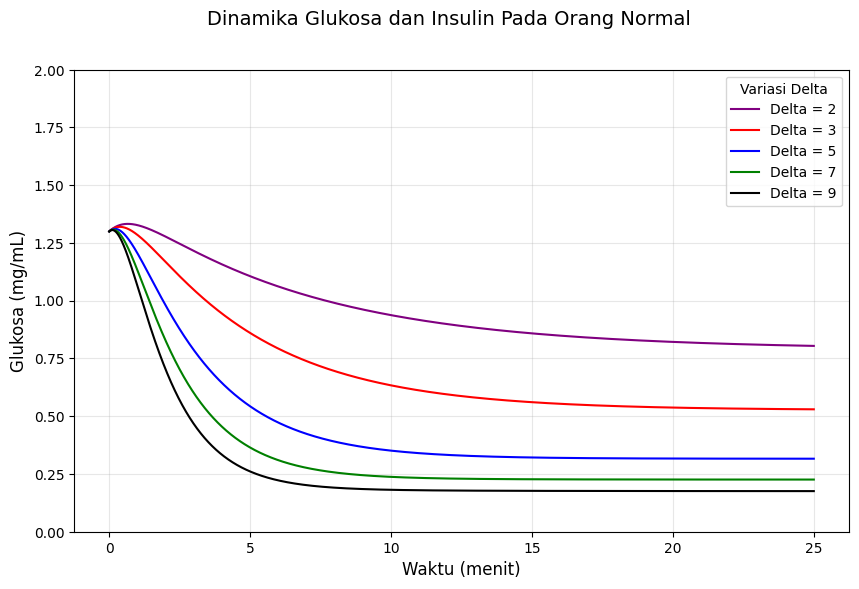

In [39]:
#1
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 12
gamma = 0.0002
theta = 0.00075919
beta = 0.01

# Rentang waktu simulasi
t = np.linspace(0, 25, 3000)

# Variasi delta yang ingin diuji
delta_list = [2, 3, 5, 7, 9]
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, delta in enumerate(delta_list):
    z0 = [130.0, 5.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Delta = {delta}',
             linestyle='dotted' if delta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Variasi Delta", fontsize=10)
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()


In [40]:
# Menghitung titik kesetimbangan berdasarkan formula yang diberikan
G_eq = alpha * beta / (beta * gamma + delta * theta)
I_eq = delta / beta

# Menghitung nilai eigen berdasarkan formula yang diberikan
lambda_1 = (-(beta * gamma) - (theta * delta)) / beta
lambda_2 = -(alpha * beta**2) / (beta * gamma + delta * theta)

# Menampilkan titik kesetimbangan dan nilai eigen
print(f"Titik Kesetimbangan: G = {G_eq:.2f}, I = {I_eq:.2f}")
print(f"Nilai Eigen: \u03bb_1 = {lambda_1:.2f}, \u03bb_2 = {lambda_2:.2f}")

Titik Kesetimbangan: G = 17.56, I = 900.00
Nilai Eigen: λ_1 = -0.68, λ_2 = -0.18


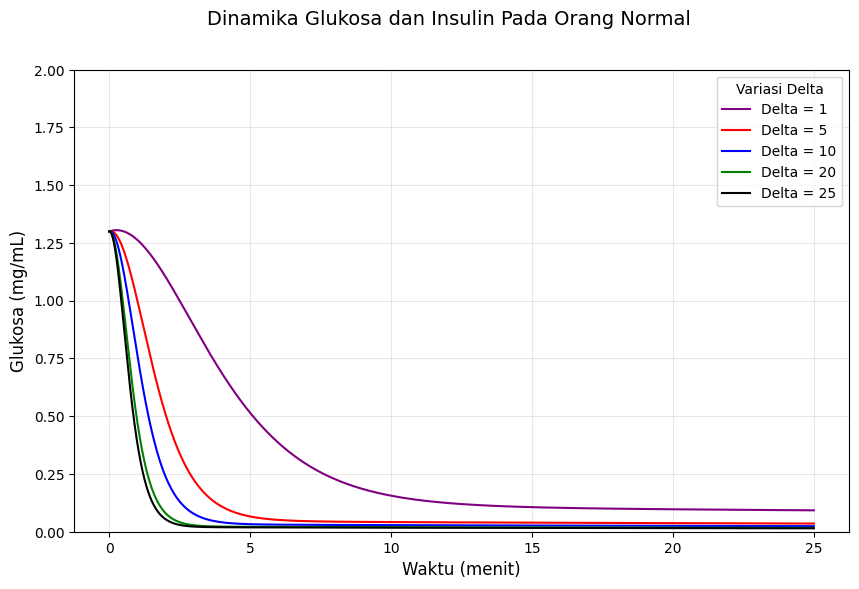

In [67]:
#1
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 5
gamma = 0.0006
theta = 0.001
beta = 0.001

#alpha = 4.5    # Penerimaan glukosa
#gamma = 0.0002 # Penggunaan glukosa tanpa insulin
#theta = 0.00075919 # Pengaruh insulin pada glukosa
#delta = 0.2298 # Sekresi insulin dari glukosa
#beta = 1500  # Clearance insulin


# Rentang waktu simulasi
t = np.linspace(0, 25, 3000)

# Variasi delta yang ingin diuji
delta_list = [1, 5, 10, 20, 25]
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, delta in enumerate(delta_list):
    z0 = [130.0, 5.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Delta = {delta}',
             linestyle='dotted' if delta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Variasi Delta", fontsize=10)
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()
